# Downloading and Extracting Dataset from Kaggle


In [1]:
# Importing TensorFlow and Installing Kaggle Package
import tensorflow as tf
!pip install kaggle

In [2]:
# Mounting Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Configuring Kaggle Authentication in Google Colab
! mkdir ~/.kaggle/
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
# Downloading Fashion Product Images Dataset from Kaggle
! kaggle datasets download -d paramaggarwal/fashion-product-images-dataset

100% 23.1G/23.1G [02:44<00:00, 133MB/s]
100% 23.1G/23.1G [02:44<00:00, 150MB/s]


In [5]:
# Creating Directory and Unzipping Fashion Product Images Dataset
! mkdir fashion_products
! unzip /content/fashion-product-images-dataset.zip -d fashion_products

Streaming output truncated to the last 5000 lines.
  inflating: fashion_products/fashion-dataset/styles/58128.json  
  inflating: fashion_products/fashion-dataset/styles/58129.json  
  inflating: fashion_products/fashion-dataset/styles/5813.json  
  inflating: fashion_products/fashion-dataset/styles/58131.json  
  inflating: fashion_products/fashion-dataset/styles/58132.json  
  inflating: fashion_products/fashion-dataset/styles/58133.json  
  inflating: fashion_products/fashion-dataset/styles/58135.json  
  inflating: fashion_products/fashion-dataset/styles/58136.json  
  inflating: fashion_products/fashion-dataset/styles/58137.json  
  inflating: fashion_products/fashion-dataset/styles/58138.json  
  inflating: fashion_products/fashion-dataset/styles/58139.json  
  inflating: fashion_products/fashion-dataset/styles/5814.json  
  inflating: fashion_products/fashion-dataset/styles/58140.json  
  inflating: fashion_products/fashion-dataset/styles/58141.json  
  inflating: fashion_produc

In [6]:
# Mounting Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Packages

In [60]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pathlib
from pathlib import Path
import PIL
import PIL.Image
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.activations import swish

pyo.init_notebook_mode()



# Loading Data

In [8]:
images_df=pd.read_csv('fashion_products/fashion-dataset/images.csv')
images_df

filename                                               link
0      15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1      39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2      59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3      21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4      53759.jpg  http://assets.myntassets.com/v1/images/style/p...
...          ...                                                ...
44441  17036.jpg  http://assets.myntassets.com/v1/images/style/p...
44442   6461.jpg  http://assets.myntassets.com/v1/images/style/p...
44443  18842.jpg  http://assets.myntassets.com/v1/images/style/p...
44444  46694.jpg  http://assets.myntassets.com/v1/images/style/p...
44445  51623.jpg  http://assets.myntassets.com/assets/images/516...

[44446 rows x 2 columns]

In [9]:
styles_df=pd.read_csv('fashion_products/fashion-dataset/styles.csv', on_bad_lines='skip')
styles_df

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44419      White  Summer  2013.0  Casual   
44420        Red  Summer  2011.0  Casual   
44421       Blue    Fall  2011.0  Casual   
44422       Blue  Spring  2017.0  Casual   
44423       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
0                     Turtle Check Men Navy Blue Shirt  
1                   Peter England Men Party Blue Jeans  
2                             Titan Women Silver Watch  
3        Manchester United Men Solid Black Track Pants  
4                                Puma Men Grey T-shirt  
...                                                ...  
44419                        Gas Men Caddy Casual Shoe  
44420               Lotto Men's Soccer Track Flip Flop  
44421             Puma Men Graphic Stellar Blue Tshirt  
44422                   Rasasi Women Blue Lady Perfume  
44423  Fossil Women Pink Dial Chronograph Watch ES3050  

[44424 rows x 10 columns]

# Exploratory Data Analysis

### Gender Distribution

In [10]:
styles_df.gender.value_counts()

Men       22147
Women     18631
Unisex     2161
Boys        830
Girls       655
Name: gender, dtype: int64

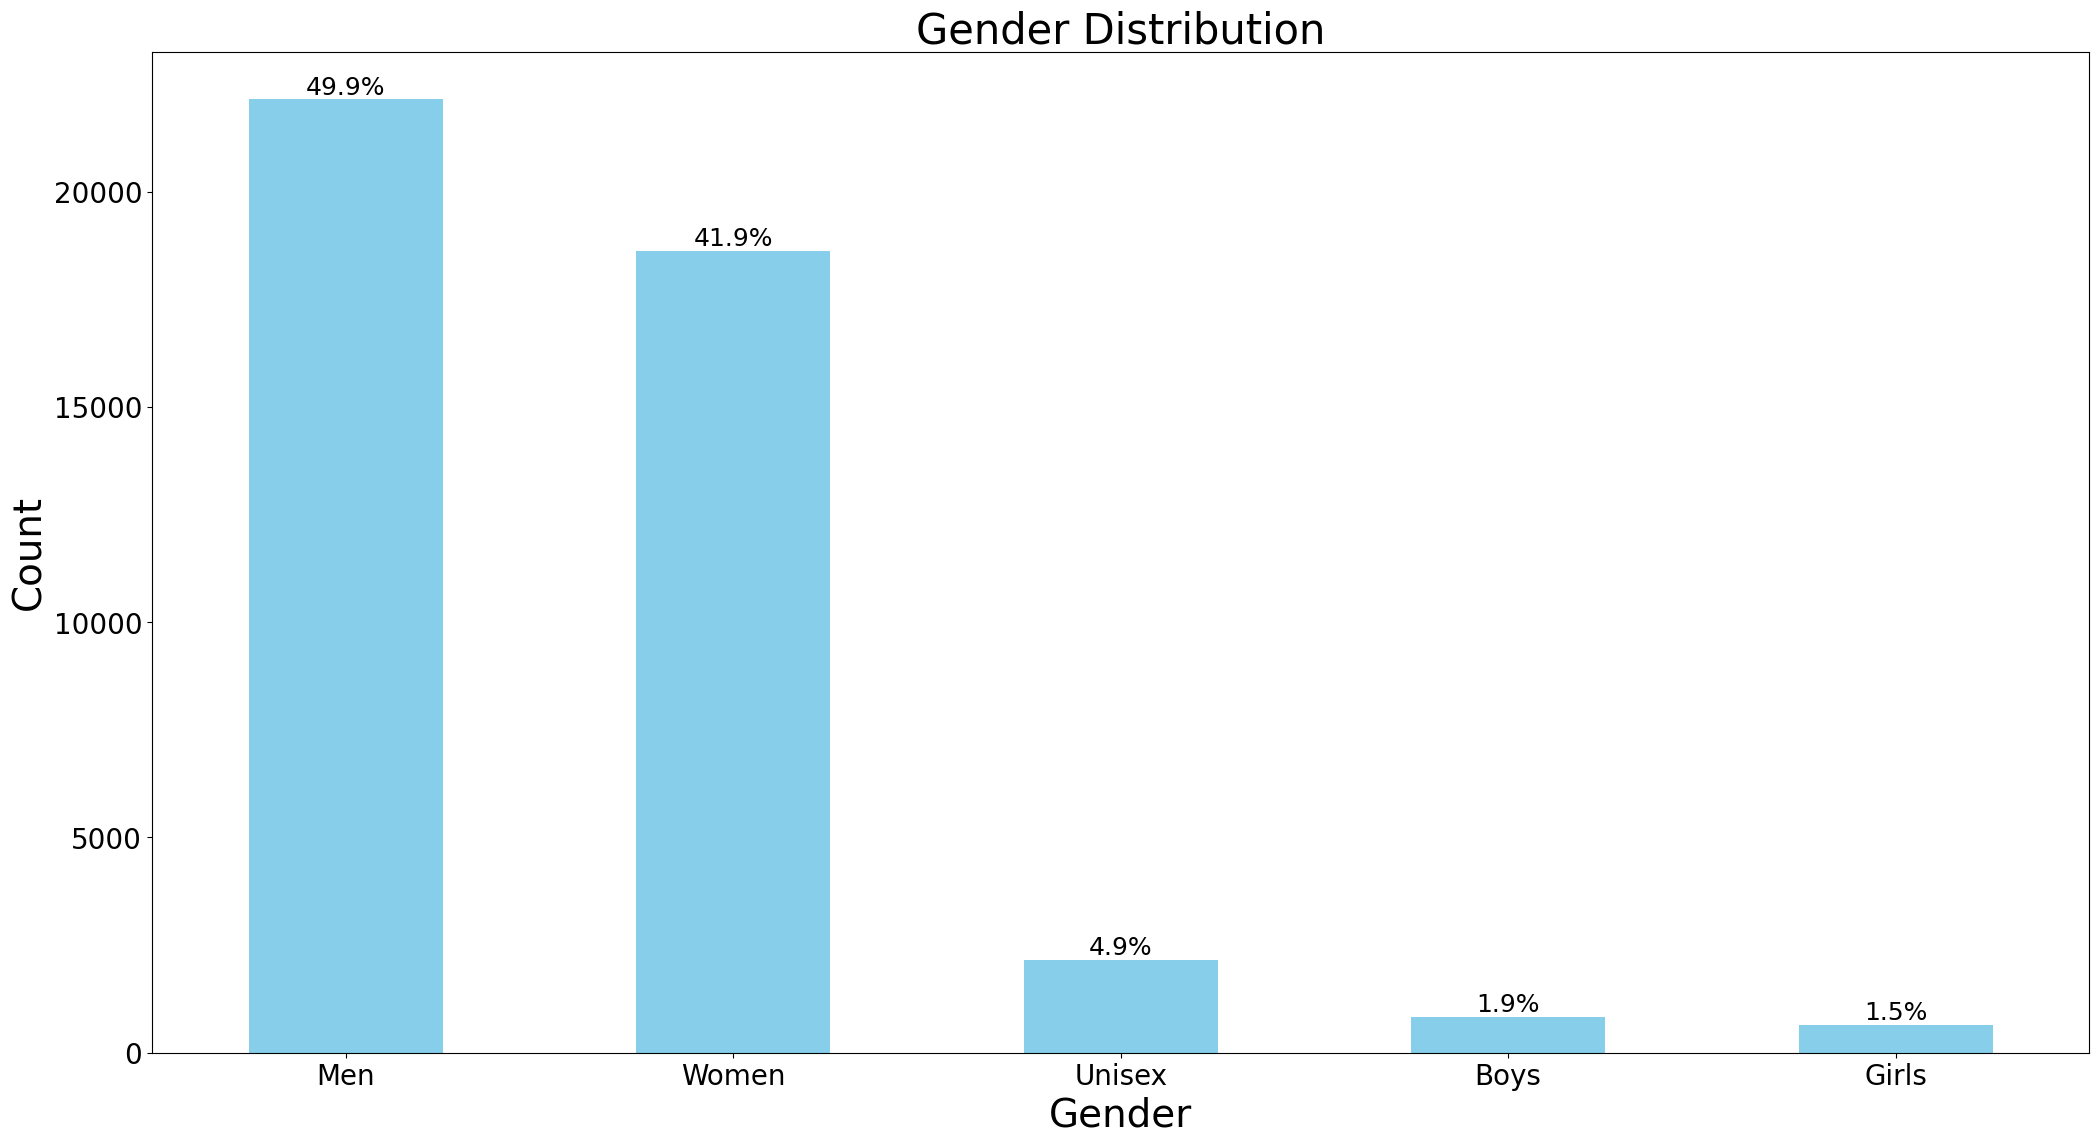

In [11]:
# Creating a bar chart
gender_counts = styles_df['gender'].value_counts()
plt.figure(figsize=(25, 13))
ax = gender_counts.plot(kind='bar', color=['skyblue'])
plt.title('Gender Distribution', fontsize=30)
plt.xlabel('Gender', fontsize=28)
plt.ylabel('Count', fontsize=28)
plt.xticks(rotation=0, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Adding percentage annotations on the bars
total = len(styles_df['gender'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=18)

plt.show()

The 'gender' column in the dataset shows the distribution of products across various gender categories.
It indicates the number of products available for each gender category. The categories include 'Men', 'Women', 'Unisex', ' 'Boys', and 'Girls'.
Among the products, the 'Men' category has the highest count with 22,147 products, followed by 'Women' with 18,631 products.
Additionally, there are 2,161 products listed under 'Unisex', 830 under 'Boys', and 655 under 'Girls'.


### Distribution of Categories

In [12]:
styles_df.masterCategory.value_counts()

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

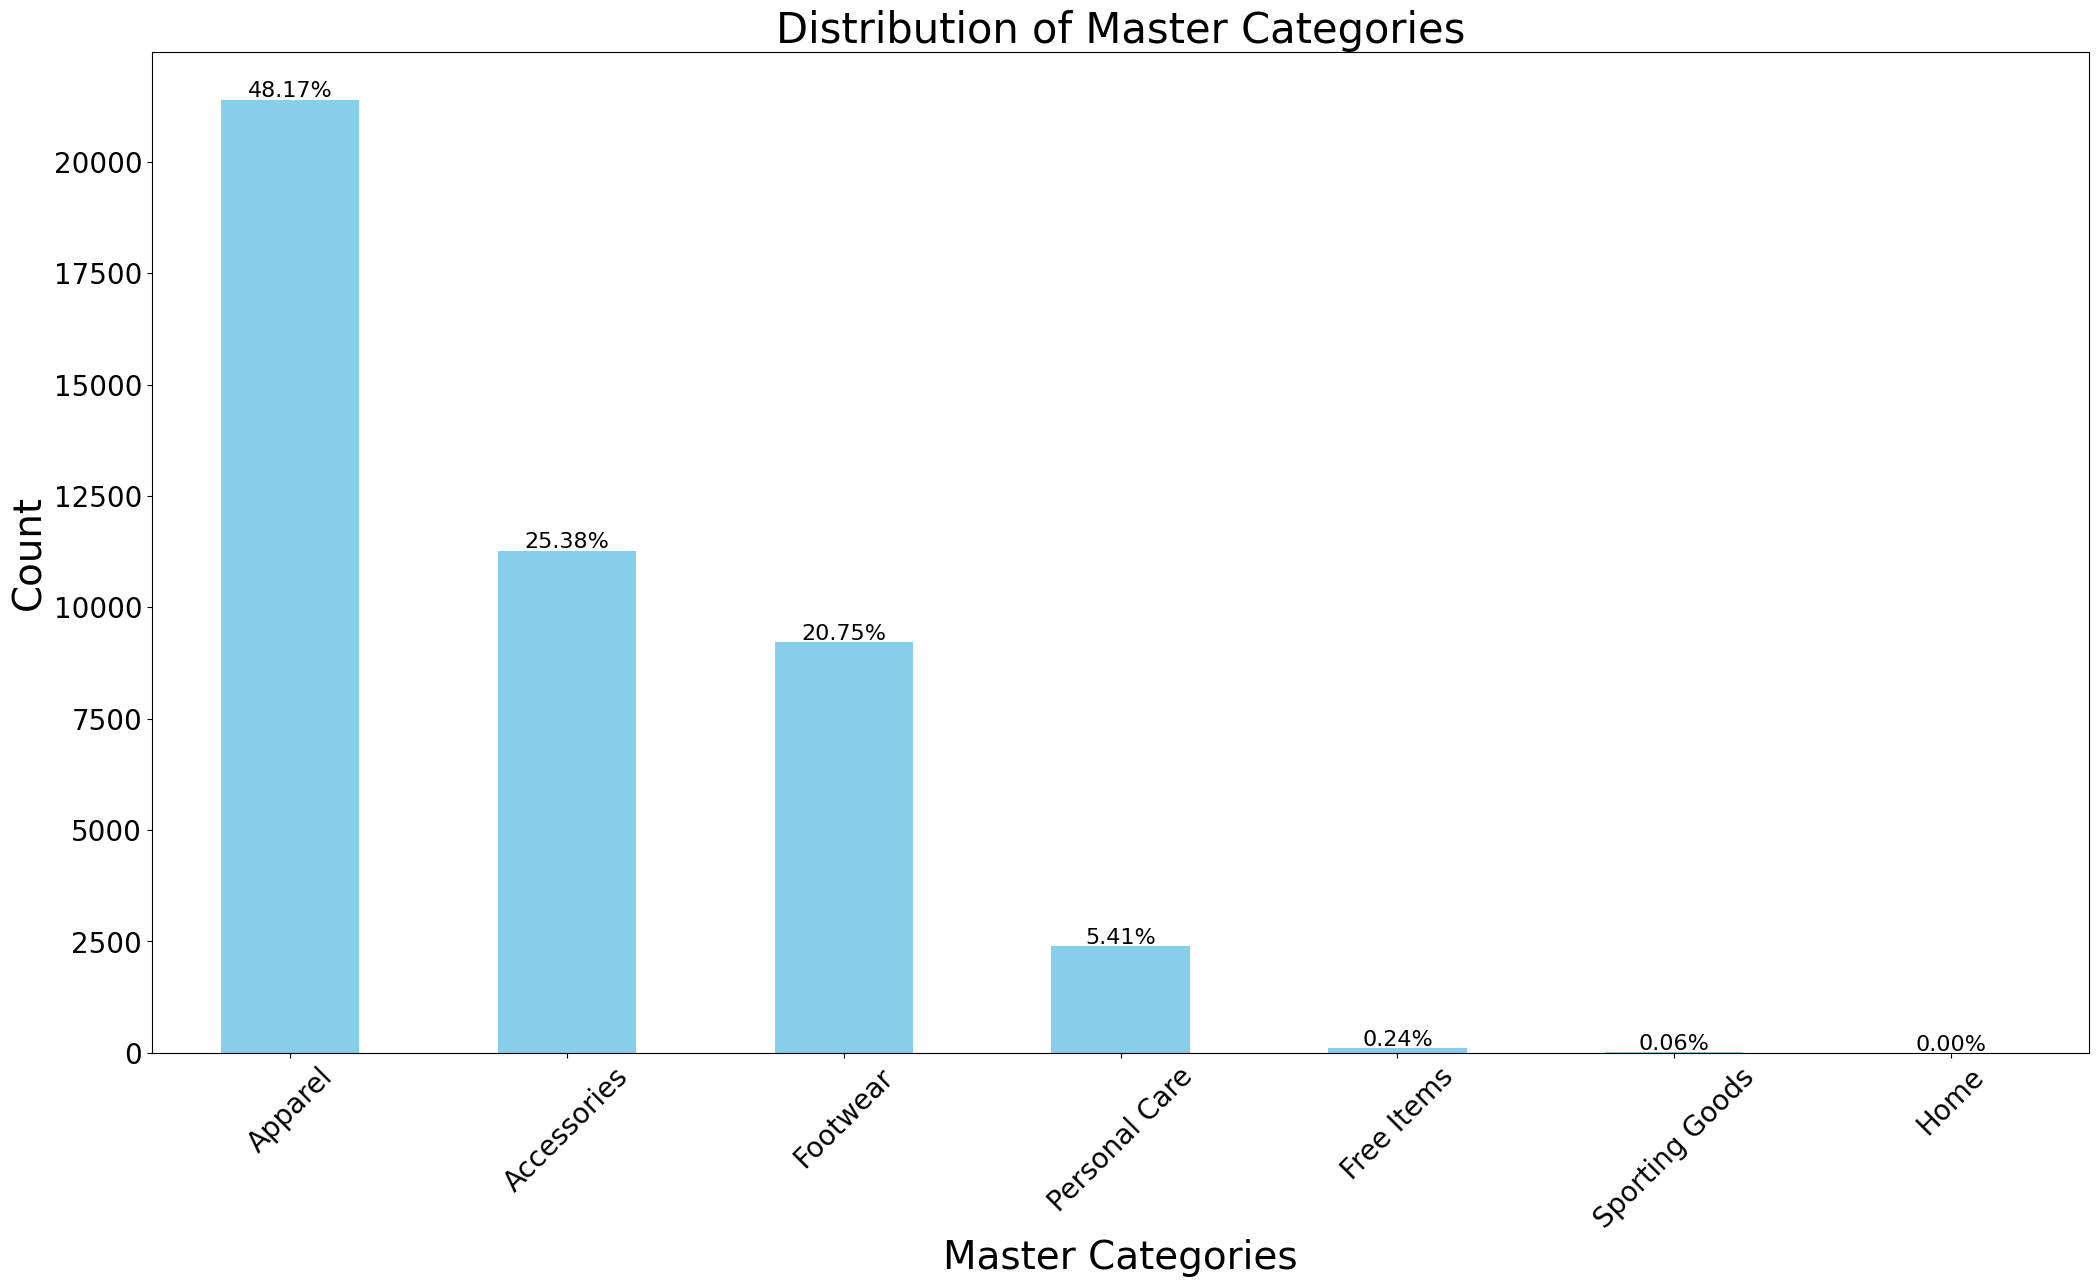

In [13]:
category_counts = styles_df['masterCategory'].value_counts()
# Creating a bar chart
plt.figure(figsize=(25, 13))
ax = category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Master Categories', fontsize=30)
plt.xlabel('Master Categories', fontsize=28)
plt.ylabel('Count', fontsize=28)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

# Calculating percentages and annotate the bars
total = len(styles_df['masterCategory'])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2, height + 50, f'{height/total:.2%}', ha='center', fontsize=16)

plt.show()

### Distribution of Master Categories

- **Apparel:** Represents a substantial portion of the dataset with 21,397 items, indicating a significant presence of clothing products.
- **Accessories:** Features a considerable count of 11,274 items, likely comprising a range of complementary products like jewelry, bags, and others.
- **Footwear:** With 9,219 items, this category represents various types of footwear available in the dataset.
- **Personal Care:** Contains a smaller quantity of items (2,403) which may consist of products like skincare, cosmetics, and personal hygiene items.
- **Free Items:** A minor category with a count of 105 items, potentially comprising products offered for free.
- **Sporting Goods:** Limited to 25 items, signifying a small range of sports-related products.
- **Home:** Least represented in the dataset with just 1 item, indicating a minimal representation of home-related items.

The 'masterCategory' data provides a broad overview of the types of products cataloged in this dataset, with apparel, accessories, and footwear being the most prevalent categories.


In [14]:
styles_df.subCategory.value_counts()

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [15]:
subcat_by_mastercat = styles_df.groupby('masterCategory')['subCategory'].apply(set)
print(subcat_by_mastercat)

masterCategory
Accessories       {Mufflers, Jewellery, Watches, Eyewear, Socks,...
Apparel           {Topwear, Bottomwear, Dress, Innerwear, Saree,...
Footwear                                {Shoes, Sandal, Flip Flops}
Free Items                                   {Free Gifts, Vouchers}
Home                                              {Home Furnishing}
Personal Care     {Bath and Body, Skin Care, Beauty Accessories,...
Sporting Goods                       {Sports Equipment, Wristbands}
Name: subCategory, dtype: object


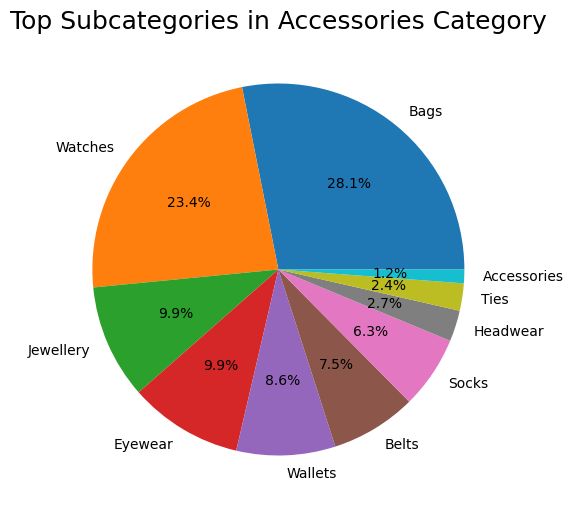

In [16]:
# Creating Pie Chart
accessories_data = styles_df[styles_df['masterCategory'] == 'Accessories']
accessories_subcategory_counts = accessories_data['subCategory'].value_counts().nlargest(10)

plt.figure(figsize=(6, 13))
accessories_subcategory_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Subcategories in Accessories Category', fontsize=18)
plt.ylabel('')
plt.show()

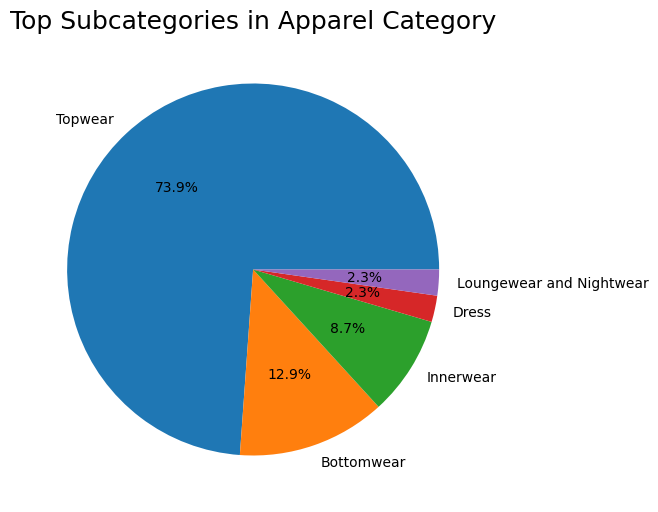

In [17]:
# Creating Pie Chart
accessories_data = styles_df[styles_df['masterCategory'] == 'Apparel']
accessories_subcategory_counts = accessories_data['subCategory'].value_counts().nlargest(5)

plt.figure(figsize=(6, 13))
accessories_subcategory_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Subcategories in Apparel Category', fontsize=18)
plt.ylabel('')
plt.show()

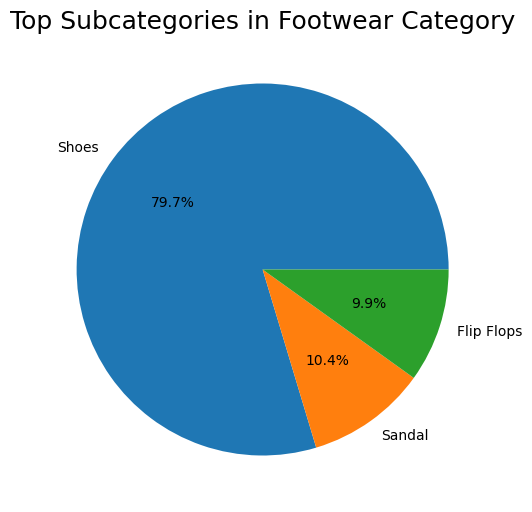

In [18]:
# Creating Pie Chart
accessories_data = styles_df[styles_df['masterCategory'] == 'Footwear']
accessories_subcategory_counts = accessories_data['subCategory'].value_counts().nlargest(3)

plt.figure(figsize=(6, 13))
accessories_subcategory_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Subcategories in Footwear Category', fontsize=18)
plt.ylabel('')
plt.show()

In [19]:
styles_df.articleType.value_counts()

Tshirts                7067
Shirts                 3217
Casual Shoes           2845
Watches                2542
Sports Shoes           2036
                       ... 
Shoe Laces                1
Mens Grooming Kit         1
Body Wash and Scrub       1
Suits                     1
Ipad                      1
Name: articleType, Length: 143, dtype: int64

In [20]:
art_by_sub = styles_df.groupby('subCategory')['articleType'].apply(set)
print(art_by_sub)

subCategory
Accessories                 {Water Bottle, Key chain, Travel Accessory, Ha...
Apparel Set                              {Swimwear, Kurta Sets, Clothing Set}
Bags                        {Rucksacks, Clutches, Tablet Sleeve, Waist Pou...
Bath and Body               {Body Wash and Scrub, Nail Essentials, Body Lo...
Beauty Accessories                                         {Beauty Accessory}
Belts                                                        {Tshirts, Belts}
Bottomwear                  {Skirts, Track Pants, Churidar, Jeans, Tracksu...
Cufflinks                                     {Cufflinks, Ties and Cufflinks}
Dress                                                     {Dresses, Jumpsuit}
Eyes                                 {Mascara, Eyeshadow, Kajal and Eyeliner}
Eyewear                                                          {Sunglasses}
Flip Flops                                                       {Flip Flops}
Fragrance                   {Fragrance Gift Set, Deo

### Seasons Distribution

In [21]:
styles_df.season.value_counts()

Summer    21472
Fall      11431
Winter     8517
Spring     2983
Name: season, dtype: int64

In [22]:
season_percentage = (styles_df['season'].value_counts(normalize=True) * 100).round(2)


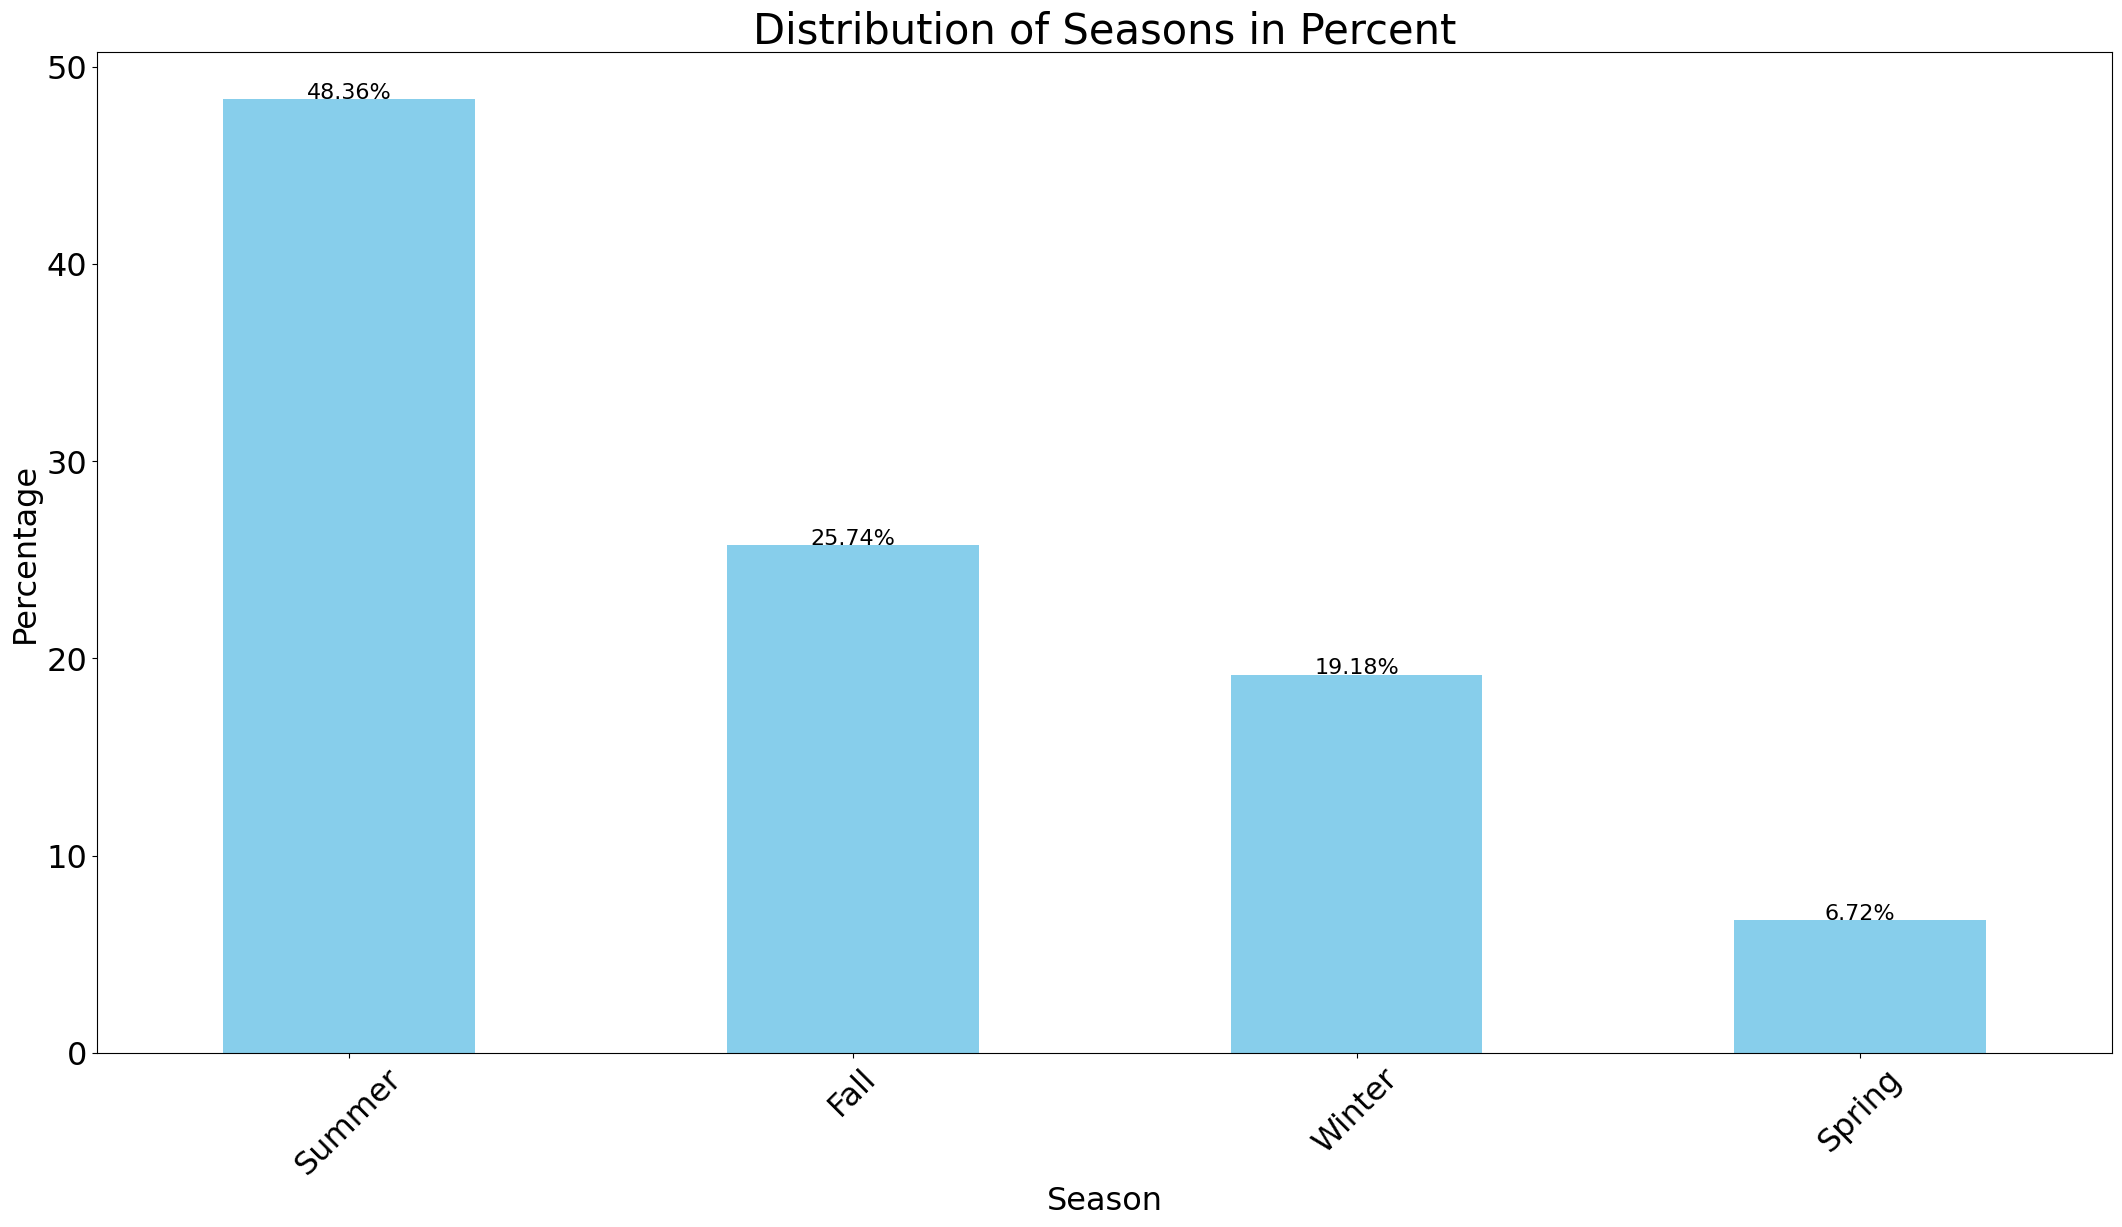

In [23]:
# Creating a bar chart
plt.figure(figsize=(26, 13))
bars = season_percentage.plot(kind='bar', color='skyblue', fontsize=23)

# Adding  percentages
for bar, percent in zip(bars.patches, season_percentage):
    bars.annotate(f'{percent}%', (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=16)

plt.title('Distribution of Seasons in Percent', fontsize=30)
plt.xlabel('Season', fontsize=23)
plt.ylabel('Percentage', fontsize=23)
plt.xticks(rotation=45)
plt.show()

### Distribution of Colors

In [24]:
styles_df.baseColour.value_counts()

Black                9728
White                5538
Blue                 4918
Brown                3494
Grey                 2741
Red                  2455
Green                2115
Pink                 1860
Navy Blue            1789
Purple               1640
Silver               1090
Yellow                778
Beige                 749
Gold                  628
Maroon                581
Orange                530
Olive                 410
Multi                 394
Cream                 390
Steel                 315
Charcoal              228
Peach                 195
Off White             182
Skin                  179
Lavender              162
Grey Melange          146
Khaki                 139
Magenta               129
Teal                  120
Tan                   114
Mustard                97
Bronze                 95
Copper                 86
Turquoise Blue         69
Rust                   66
Burgundy               45
Metallic               43
Coffee Brown           31
Mauve       

### Distribution of Styles

In [25]:
styles_df.usage.value_counts()

Casual          34406
Sports           4025
Ethnic           3208
Formal           2345
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64

### Distribution of Years

In [26]:
styles_df['year'] = styles_df['year'].astype(str).str[-4:]


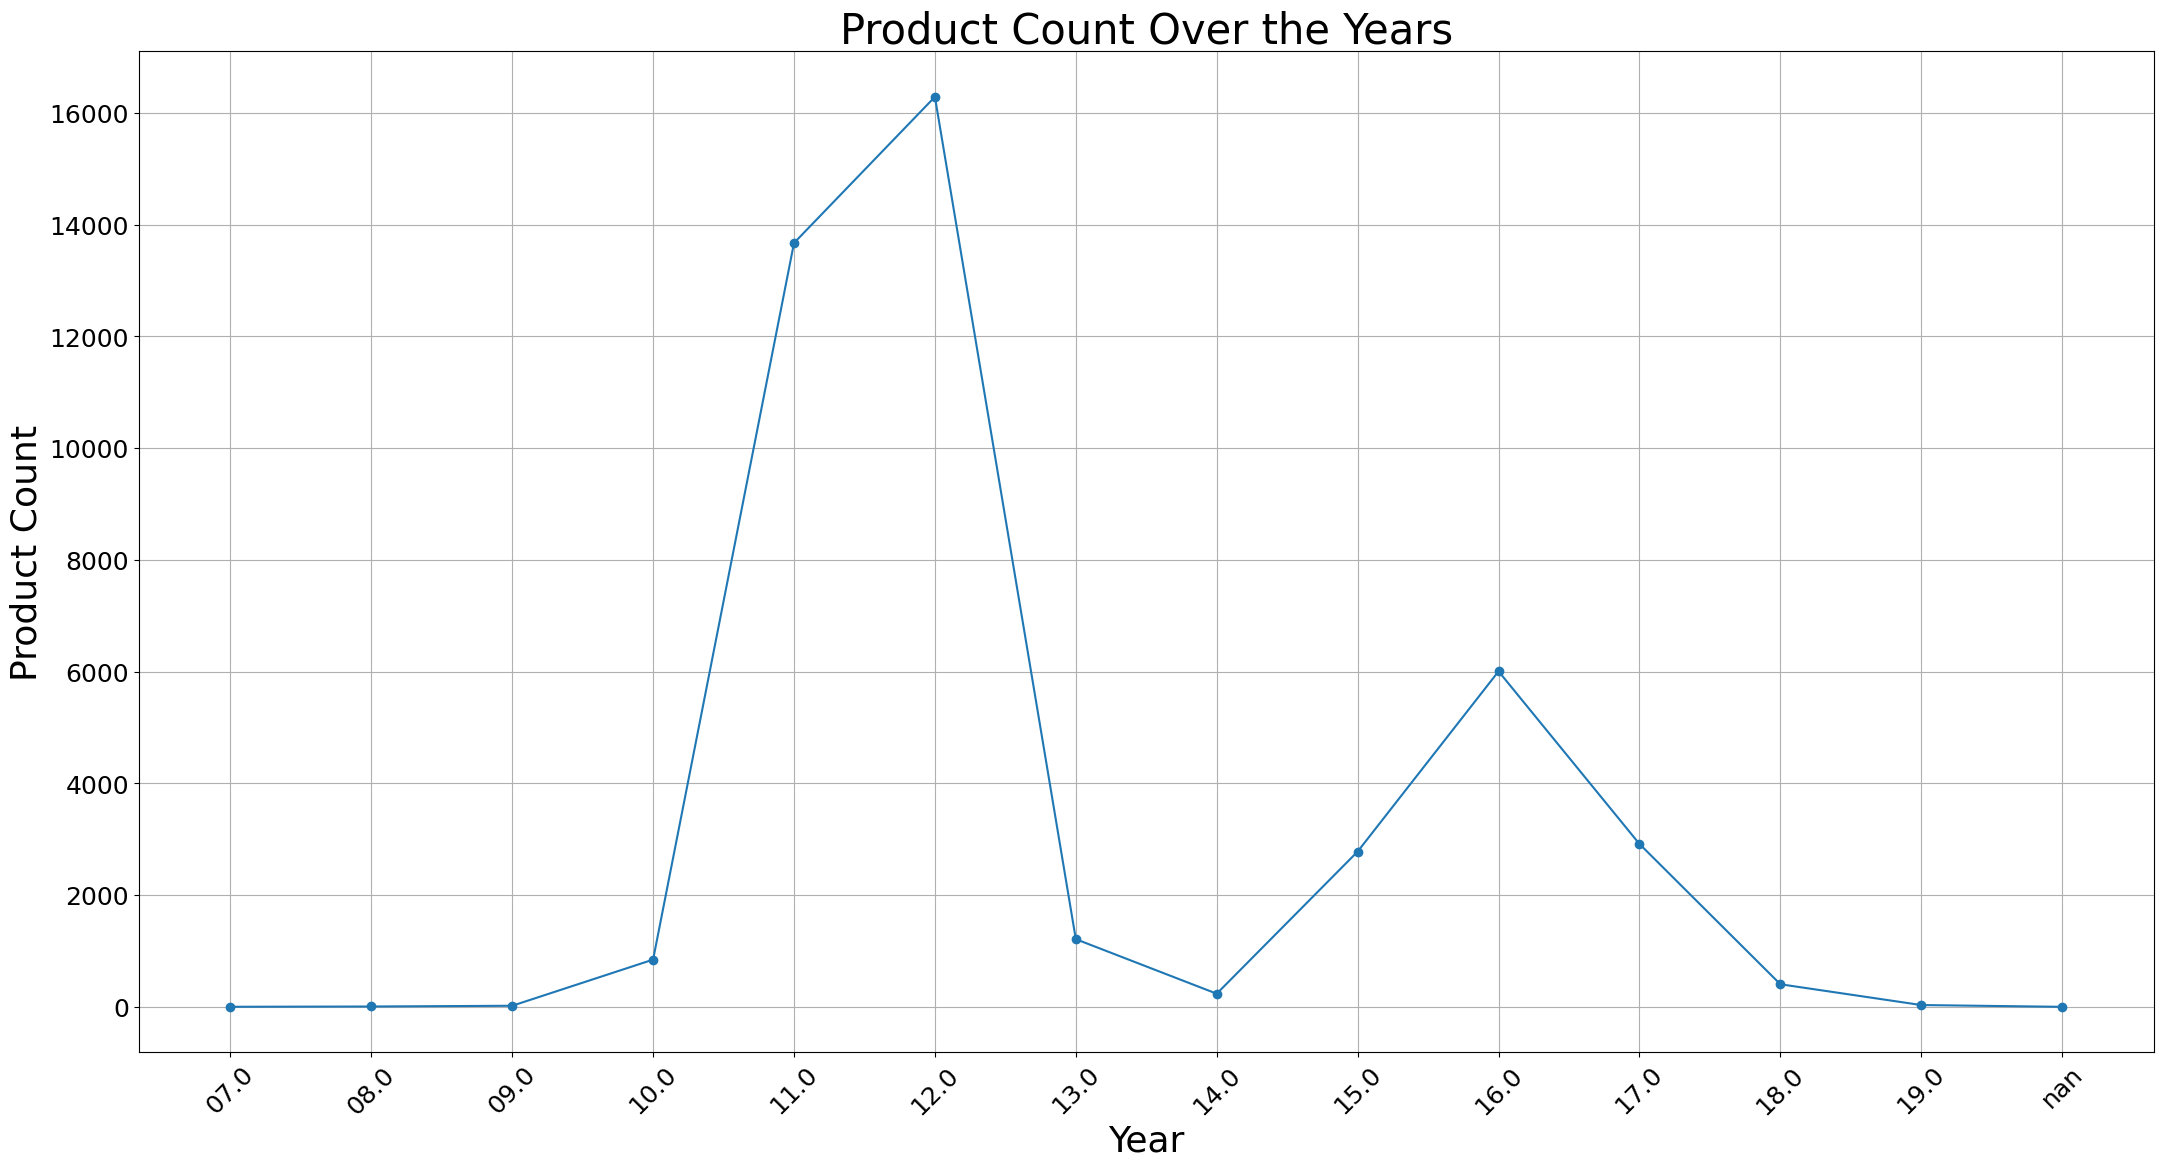

In [27]:
year_counts = styles_df['year'].value_counts().sort_index()

plt.figure(figsize=(26, 13))
plt.plot(year_counts, marker='o')
plt.title('Product Count Over the Years', fontsize=30)
plt.xlabel('Year', fontsize=26)
plt.ylabel('Product Count', fontsize=26)
plt.xticks(year_counts.index, rotation=45, fontsize=18)
plt.yticks(rotation=0, fontsize=18)
plt.grid(True)
plt.show()

### Men's Fashion Styles by Various Attributes

In [28]:
men_styles = styles_df[styles_df['gender'] == 'Men']

columns = ['masterCategory', 'subCategory', 'articleType', 'baseColour', 'usage']

for col in columns:
    top_5 = men_styles[men_styles['gender'] == 'Men'][col].value_counts().head(5)
    print(f"Top 5 for '{col}' in Men's styles:")
    print(top_5)
    print('\n')

Top 5 for 'masterCategory' in Men's styles:
Apparel          11352
Footwear          5751
Accessories       4412
Personal Care      579
Free Items          53
Name: masterCategory, dtype: int64


Top 5 for 'subCategory' in Men's styles:
Topwear       8841
Shoes         4477
Watches       1473
Bottomwear    1399
Innerwear      988
Name: subCategory, dtype: int64


Top 5 for 'articleType' in Men's styles:
Tshirts         5243
Shirts          2844
Casual Shoes    2247
Sports Shoes    1590
Watches         1473
Name: articleType, dtype: int64


Top 5 for 'baseColour' in Men's styles:
Black    5881
White    3102
Blue     2676
Brown    1951
Grey     1810
Name: baseColour, dtype: int64


Top 5 for 'usage' in Men's styles:
Casual          16769
Sports           2954
Formal           2235
Ethnic            107
Smart Casual       54
Name: usage, dtype: int64




- Apparel and Footwear are the dominant categories among Men's styles, significantly more popular compared to Accessories, Personal Care, and Free Items
- Topwear, including T-shirts and shirts, stands out as the most prevalent subcategory. This suggests a high demand for upper body clothing. Additionally, shoes are quite popular among Men's styles.
- The popularity of black, white, and blue color preferences indicates a significant trend. Neutral tones and versatile shades dominate, with black being the most prevalent choice for men's fashion.
- The highest usage category is 'Casual', followed by 'Sports'. It's evident that casual and sportswear are among the most popular usage choices for men, reflecting a preference for everyday comfort.

### Women's Fashion Styles by Various Attributes

In [29]:
women_styles = styles_df[styles_df['gender'] == 'Women']

columns = ['masterCategory', 'subCategory', 'articleType', 'baseColour', 'usage']

for col in columns:
    top_5 = women_styles[women_styles['gender'] == 'Women'][col].value_counts().head(5)
    print(f"Top 5 for '{col}' in Women's styles:")
    print(top_5)
    print('\n')

Top 5 for 'masterCategory' in Women's styles:
Apparel          8623
Accessories      5320
Footwear         2836
Personal Care    1809
Free Items         43
Name: masterCategory, dtype: int64


Top 5 for 'subCategory' in Women's styles:
Topwear       5499
Shoes         2555
Bags          2071
Bottomwear    1044
Jewellery     1014
Name: subCategory, dtype: int64


Top 5 for 'articleType' in Women's styles:
Kurtas      1761
Handbags    1689
Tops        1532
Heels       1322
Tshirts     1116
Name: articleType, dtype: int64


Top 5 for 'baseColour' in Women's styles:
Black    2949
White    2029
Blue     1718
Pink     1488
Brown    1400
Name: baseColour, dtype: int64


Top 5 for 'usage' in Women's styles:
Casual    14366
Ethnic     3083
Sports      765
Formal      109
Party        27
Name: usage, dtype: int64




- Apparel and Accessories stand out as the most favored categories among Women's styles, followed by Footwear and Personal Care. Free Items are the least prevalent among these categories.
- Topwear, Shoes, Bags, Bottomwear, and Jewellery appear as the top 5 subcategories.
- Kurtas and Handbags are the top article types for women, followed by tops, heels, and T-shirts.
-  The most preferred base colors for women's styles include black, white, blue, pink, and brown. It signifies a penchant for versatile, neutral colors like black and white, along with shades of blue, pink, and brown.
-  Casual usage is the most predominant among Women's styles, followed by ethnic wear. Sports, formal, and party categories appear less prevalent in women's fashion.

# Loading Image Data

In [30]:
# Displaying List of Files in the Image Directory
File_PATH = 'fashion_products/fashion-dataset/images/'
print(os.listdir(File_PATH))

['18910.jpg', '47583.jpg', '52323.jpg', '34628.jpg', '50003.jpg', '4759.jpg', '10826.jpg', '11101.jpg', '41878.jpg', '41551.jpg', '52176.jpg', '17217.jpg', '54711.jpg', '59240.jpg', '5111.jpg', '7465.jpg', '12439.jpg', '49931.jpg', '12958.jpg', '28883.jpg', '9929.jpg', '8860.jpg', '4878.jpg', '13326.jpg', '46906.jpg', '54524.jpg', '12722.jpg', '52670.jpg', '48221.jpg', '52999.jpg', '51561.jpg', '20021.jpg', '23094.jpg', '32623.jpg', '36415.jpg', '49687.jpg', '6361.jpg', '19128.jpg', '16990.jpg', '21991.jpg', '32321.jpg', '17072.jpg', '25349.jpg', '32566.jpg', '33343.jpg', '8790.jpg', '46894.jpg', '28113.jpg', '43337.jpg', '31927.jpg', '30095.jpg', '5459.jpg', '13065.jpg', '48152.jpg', '33767.jpg', '15089.jpg', '46379.jpg', '29674.jpg', '42114.jpg', '49098.jpg', '7533.jpg', '54225.jpg', '19956.jpg', '49670.jpg', '42031.jpg', '16498.jpg', '37810.jpg', '50343.jpg', '16383.jpg', '26522.jpg', '44954.jpg', '36383.jpg', '55924.jpg', '51631.jpg', '16471.jpg', '57508.jpg', '32582.jpg', '21143.j

In [31]:
# Displaying List of Files in the CSV Directory
CSV_PATH = 'fashion_products/fashion-dataset'
print(os.listdir(CSV_PATH))

['styles.csv', 'fashion-dataset', 'images.csv', 'images', 'styles']


In [32]:
# Creating Image List from CSV Directory
data_dir = pathlib.Path(CSV_PATH)
images = list(data_dir.glob('*/*.jpg'))

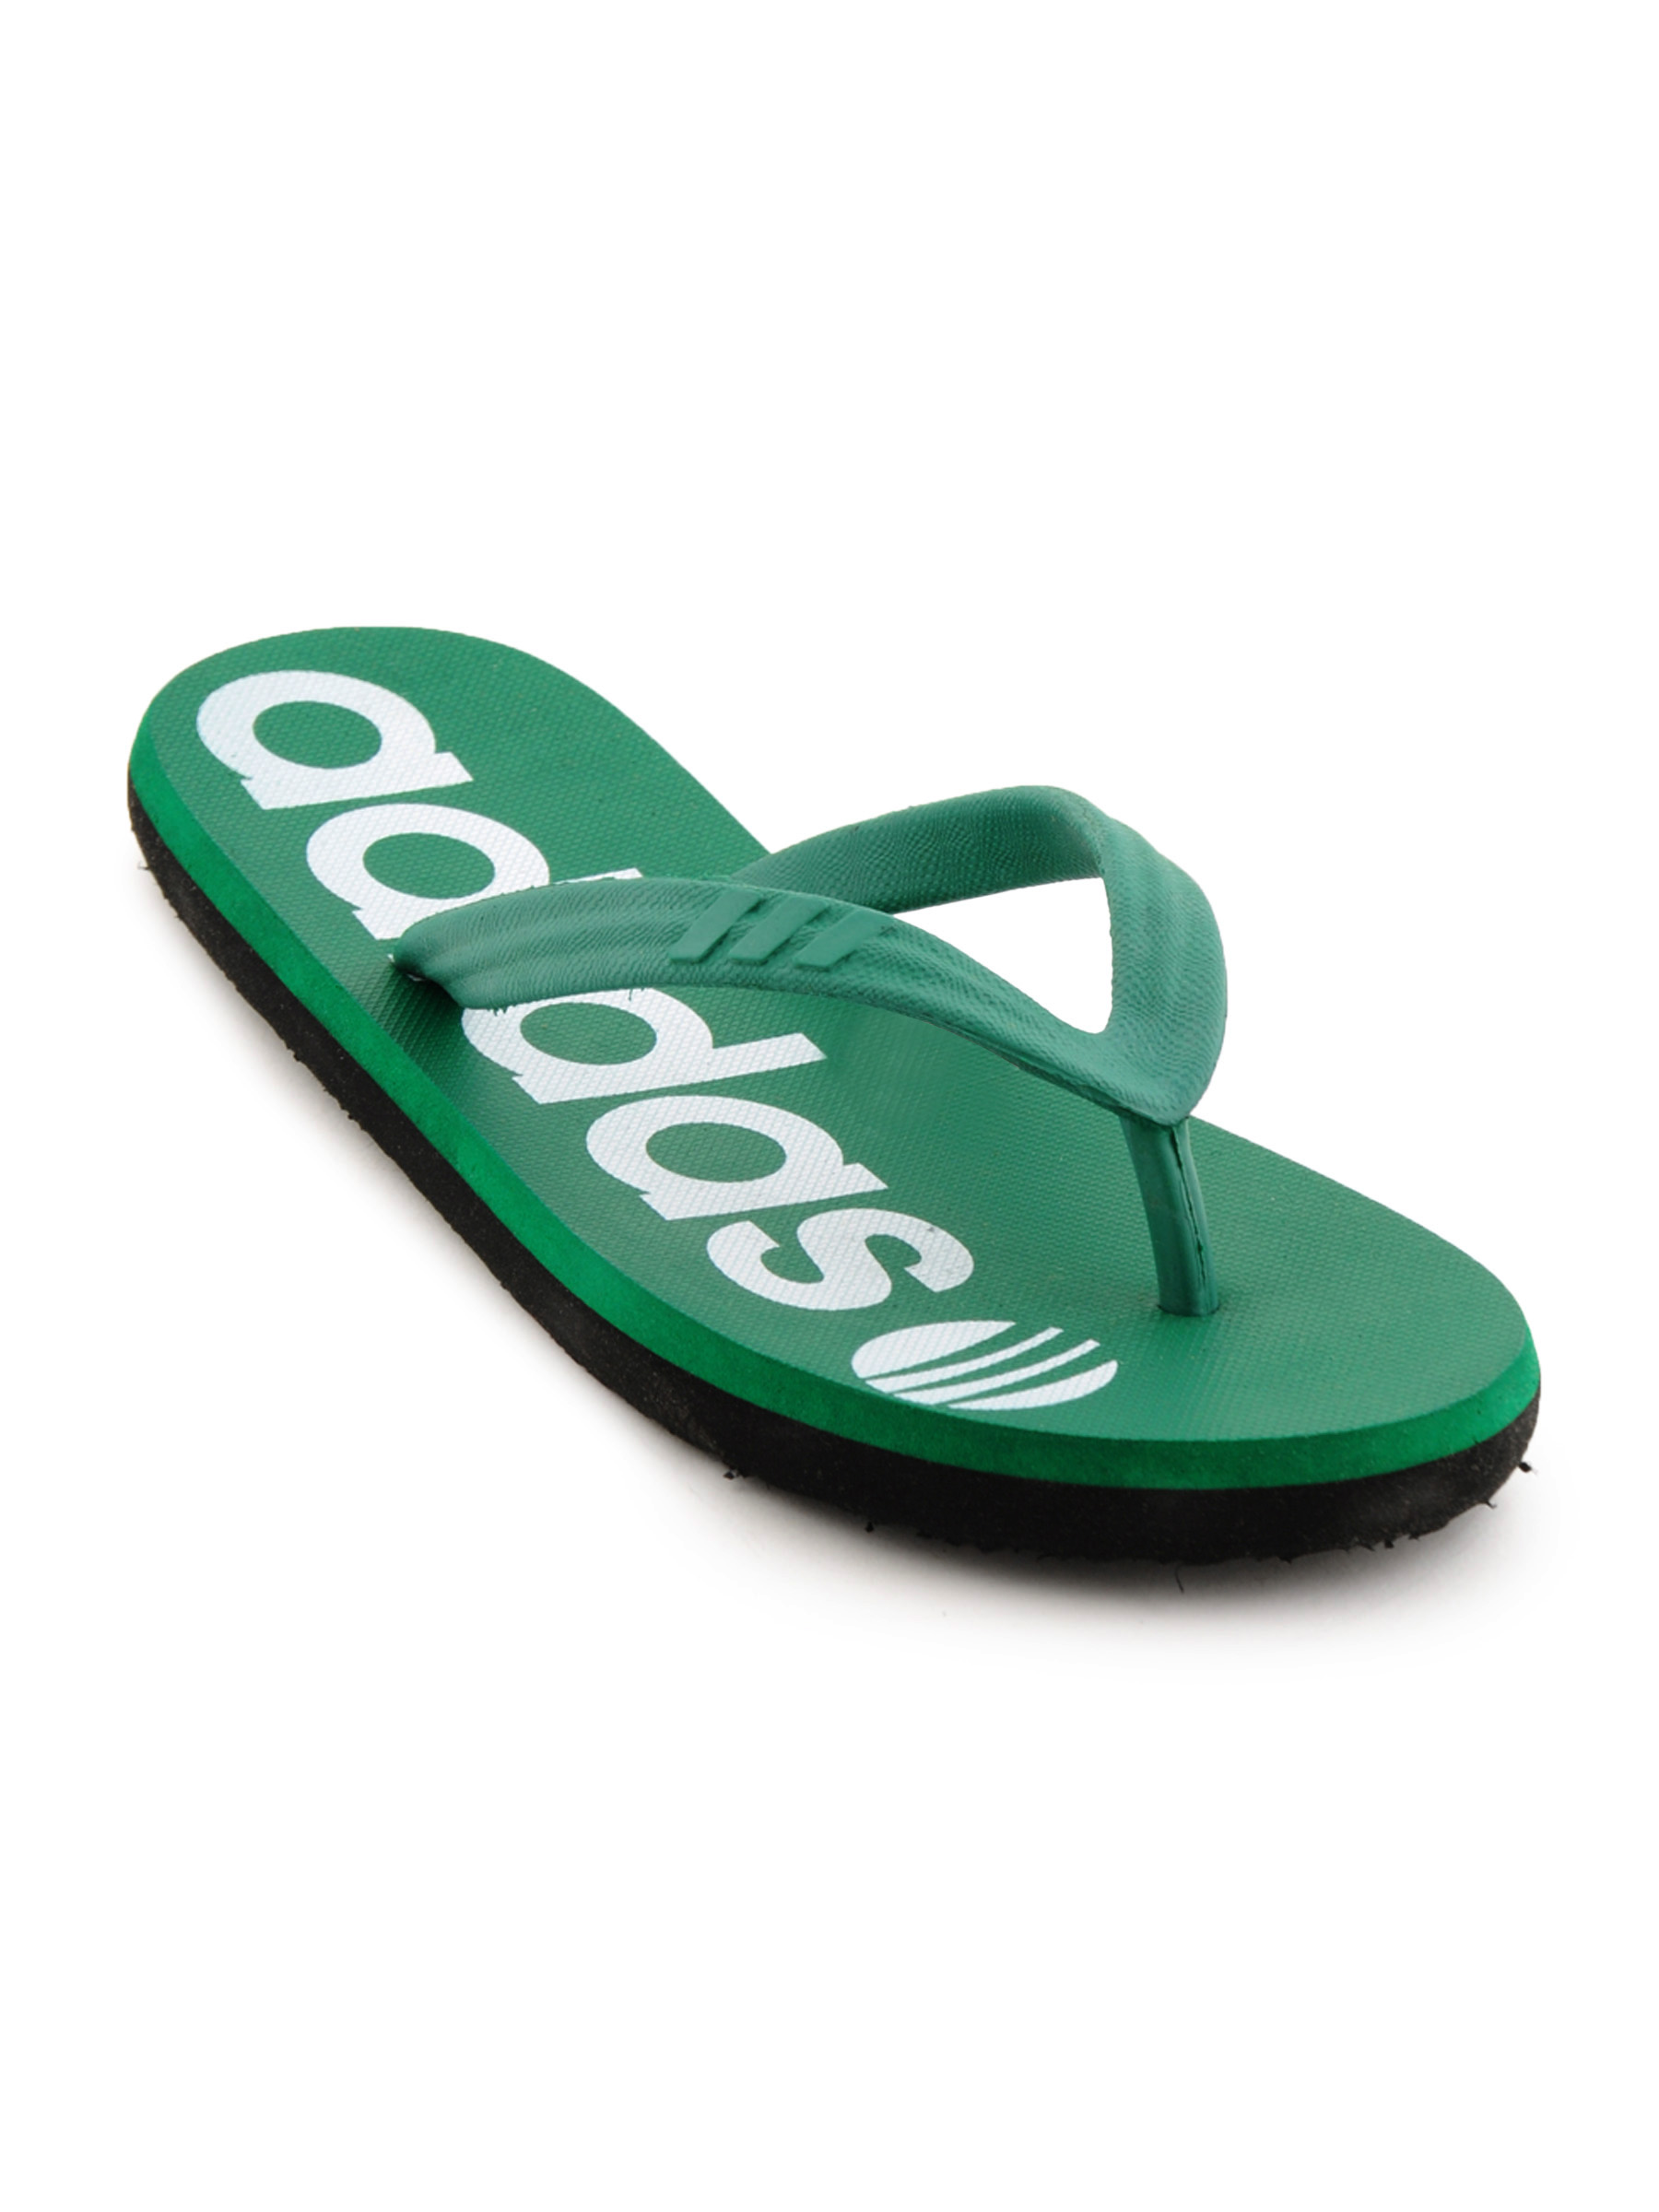

In [33]:
# Displaying the First Image from the List
PIL.Image.open(str(images[0]))

In [34]:
# Creating Image Paths for Styles Data: Associating File Paths with IDs
styles_df['image'] = styles_df.apply(lambda row: os.path.join(CSV_PATH, 'images', str(row['id']) + ".jpg"), axis=1)
styles_df.head()
styles_df.sort_values(by='id').reset_index(drop=True)

id  gender masterCategory subCategory articleType baseColour  \
0       1163     Men        Apparel     Topwear     Tshirts       Blue   
1       1164     Men        Apparel     Topwear     Tshirts       Blue   
2       1165     Men        Apparel     Topwear     Tshirts       Blue   
3       1525  Unisex    Accessories        Bags   Backpacks  Navy Blue   
4       1526  Unisex    Accessories        Bags   Backpacks      Black   
...      ...     ...            ...         ...         ...        ...   
44419  59995   Women        Apparel       Dress     Dresses      Black   
44420  59996   Women        Apparel       Dress     Dresses     Purple   
44421  59998   Women       Footwear       Shoes       Heels      Multi   
44422  59999   Women       Footwear       Shoes       Heels     Bronze   
44423  60000   Women        Apparel     Topwear      Kurtas       Blue   

       season  year   usage                                productDisplayName  \
0      Summer  11.0  Sports  Nike Sahara Team India Fanwear Round Neck Jersey   
1      Winter  15.0  Sports           Nike Men Blue T20 Indian Cricket Jersey   
2      Summer  13.0  Sports               Nike Mean Team India Cricket Jersey   
3        Fall  10.0  Casual                      Puma Deck Navy Blue Backpack   
4        Fall  10.0  Sports                       Puma Big Cat Backpack Black   
...       ...   ...     ...                                               ...   
44419    Fall  12.0   Party                               Avirate Black Dress   
44420  Summer  14.0  Casual                      Avirate Black & Purple Dress   
44421  Winter  15.0  Casual                Catwalk Women Multi Coloured Heels   
44422  Winter  15.0  Casual                       Catwalk Women Bronze Wedges   
44423    Fall  12.0  Ethnic                             Alma Women Blue Kurta   

                                                   image  
0       fashion_products/fashion-dataset/images/1163.jpg  
1       fashion_products/fashion-dataset/images/1164.jpg  
2       fashion_products/fashion-dataset/images/1165.jpg  
3       fashion_products/fashion-dataset/images/1525.jpg  
4       fashion_products/fashion-dataset/images/1526.jpg  
...                                                  ...  
44419  fashion_products/fashion-dataset/images/59995.jpg  
44420  fashion_products/fashion-dataset/images/59996.jpg  
44421  fashion_products/fashion-dataset/images/59998.jpg  
44422  fashion_products/fashion-dataset/images/59999.jpg  
44423  fashion_products/fashion-dataset/images/60000.jpg  

[44424 rows x 11 columns]

In [40]:
# Filtering DataFrame: Men and Women's Data Selection
df = styles_df[styles_df['gender'].isin(['Men', 'Women'])]

# Train Test Split

In [41]:
# Splitting the DataFrame into Train and Test Sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [42]:
# Splitting Images into Train and Test Sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

### Processing Train/Test Set Images for File and Label List

In [43]:
# Extracting Gender Labels from DataFrame as Label
labels = df['gender']

In [44]:
# Creating Image Label Dictionary
image_label_dict = dict(zip(images, labels))

In [45]:
# Converting all paths in train_images to PosixPath objects for consistency
train_images_paths = [Path(image) for image in train_images]

In [46]:
# Creating a set of image paths for quicker lookup
image_label_paths = set(image_label_dict.keys())

In [47]:
# Find the intersection of train_images and image_label_dict to ensure all paths are present
common_paths = set(train_images_paths) & image_label_paths

In [48]:
# Create train_files_list using the common paths
train_files_list = [(str(image), image_label_dict[image]) for image in common_paths]

- Train_files_list is a list of tuples, with each tuple containing the string representation of an image path and its corresponding label

In [49]:
# Same for test
test_images_paths = [Path(image) for image in test_images]
image_label_paths = set(image_label_dict.keys())
common_test_paths = set(test_images_paths) & image_label_paths
test_files_list = [(str(image), image_label_dict[image]) for image in common_test_paths]

In [111]:
train_files_list

[('fashion_products/fashion-dataset/images/25198.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/2937.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/40317.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/7863.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/25450.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/55247.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/40133.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/50655.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/2778.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/51353.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/31329.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/55549.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/49009.jpg', 'Men'),
 ('fashion_products/fashion-dataset/images/28692.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/19041.jpg', 'Women'),
 ('fashion_products/fashion-dataset/images/2

## Creating Function For Organizing Images


In [50]:
def organize_images_by_class(files_list, output_dir):
    # Creating separate folders for each class
    classes = set(label for _, label in files_list)
    for class_name in classes:
        class_dir = os.path.join(output_dir, str(class_name))
        os.makedirs(class_dir, exist_ok=True)

    # Copying images to corresponding class folders
    for file_path, label in files_list:
        class_folder = os.path.join(output_dir, str(label))
        destination = os.path.join(class_folder, os.path.basename(file_path))
        shutil.copy(file_path, destination)

In [51]:
organize_images_by_class(train_files_list, 'train')

In [52]:
organize_images_by_class(test_files_list, 'test')

## Constructing a Convolutional Neural Network (CNN) for image classification using TensorFlow

In [77]:
# Assuming standard image size of 64x64 pixels and 3 channels (RGB)
img_height, img_width, img_channels = 224, 224, 3
num_classes = 2

In [78]:
# Directory paths for train and test data
train_dir = '/content/train'
test_dir = '/content/test'

In [79]:
# Defining the directory path for the training data
data_directory_train = '/content/train'

In [80]:
# Creating a TensorFlow Dataset using images from the training directory
dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory_train,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=32)

Found 32620 files belonging to 2 classes.


In [81]:
# Defining the EarlyStopping callback
early_stopping = EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)

In [82]:
# Creating CNN model
model_cnn = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid') ])

In [83]:
# Compiling the model with Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
# Model Training with Early Stopping
history = model_cnn.fit(dataset, epochs=15, callbacks=[early_stopping])

Epoch 1/15
1020/1020 [==============================] - 137s 122ms/step - loss: 23.1509 - accuracy: 0.5409
Epoch 2/15
1020/1020 [==============================] - 119s 116ms/step - loss: 0.6785 - accuracy: 0.5626
Epoch 3/15
1020/1020 [==============================] - 126s 122ms/step - loss: 0.6409 - accuracy: 0.5977
Epoch 4/15
1020/1020 [==============================] - 125s 122ms/step - loss: 0.6087 - accuracy: 0.6284
Epoch 5/15
1020/1020 [==============================] - 126s 122ms/step - loss: 0.5747 - accuracy: 0.6568
Epoch 6/15
1020/1020 [==============================] - 124s 120ms/step - loss: 0.5530 - accuracy: 0.6785
Epoch 7/15
1020/1020 [==============================] - 119s 116ms/step - loss: 0.5217 - accuracy: 0.7011
Epoch 8/15
1020/1020 [==============================] - 123s 119ms/step - loss: 0.5054 - accuracy: 0.7099
Epoch 9/15
1020/1020 [==============================] - 121s 118ms/step - loss: 0.4807 - accuracy: 0.7228
Epoch 10/15
1020/1020 [======================

The initial accuracy was 54.09% with a high loss of 23.15.
By the end of the 15 epochs, the accuracy improved to 81.01%, and the loss decreased to 0.3418.

In [148]:
model_path = 'fashion_products/fashion-dataset/model.h5'
model_cnn.save('/content/drive/MyDrive/my_model.h33')

In [86]:
# Get loss and accuracy from the history
loss = history.history['loss']

In [87]:
# Creating a list of epochs to use for the x-axis
epochs = range(1, len(loss) + 1)

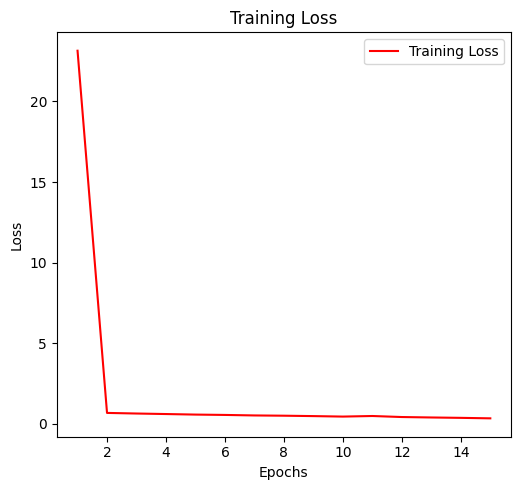

In [88]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
# Getting accuracy from the history
accuracy = history.history['accuracy']

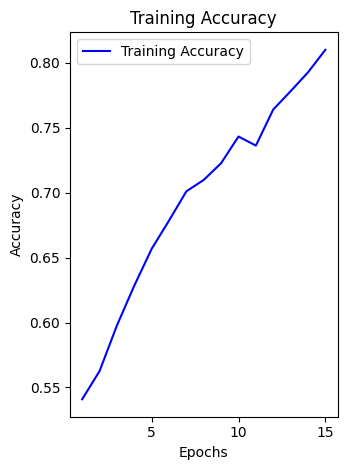

In [90]:
# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



## Hyperparameter Tuning(CNN)



In [91]:
# Creating a TensorFlow dataset from the training directory with a validation split
dataset_cv = tf.keras.utils.image_dataset_from_directory(
    data_directory_train,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=123)

Found 32620 files belonging to 2 classes.
Using 26096 files for training.


In [92]:
# Modifying model architecture
model_cnn_cv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [93]:
# Model Compilation
model_cnn_cv.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [94]:
# Modifying Model Training with Early Stopping
history_cnn = model_cnn_cv.fit(dataset_cv, epochs=40, callbacks=[early_stopping])

Epoch 1/40
816/816 [==============================] - 100s 121ms/step - loss: 126.7098 - accuracy: 0.5048
Epoch 2/40
816/816 [==============================] - 94s 114ms/step - loss: 1.3849 - accuracy: 0.6908
Epoch 3/40
816/816 [==============================] - 100s 121ms/step - loss: 0.6478 - accuracy: 0.8097
Epoch 4/40
816/816 [==============================] - 100s 121ms/step - loss: 0.5719 - accuracy: 0.8686
Epoch 5/40
816/816 [==============================] - 97s 118ms/step - loss: 0.5592 - accuracy: 0.8908
Epoch 6/40
816/816 [==============================] - 95s 116ms/step - loss: 0.5255 - accuracy: 0.8928
Epoch 7/40
816/816 [==============================] - 95s 115ms/step - loss: 0.4841 - accuracy: 0.8781
Epoch 8/40
816/816 [==============================] - 94s 114ms/step - loss: 0.4044 - accuracy: 0.8861
Epoch 9/40
816/816 [==============================] - 95s 115ms/step - loss: 0.3111 - accuracy: 0.9134
Epoch 10/40
816/816 [==============================] - 98s 118ms/ste

The loss initially decreases from 0.5255 to 0.1736 and then slightly increases to 0.1774.
The accuracy rises from 0.8928 to 0.9428, followed by a slight decrease.
Initially, the model shows significant improvement in accuracy.
The loss and accuracy exhibit some fluctuations in the later epochs.

The fluctuations in loss and accuracy towards the end might indicate the model is struggling to generalize well, potentially overfitting or encountering issues due to the dataset's complexity.


In [147]:
model_path = 'fashion_products/fashion-dataset/model.h6'
model_cnn_cv.save('/content/drive/MyDrive/my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [96]:
# Get loss and accuracy from the history
loss_cv = history_cnn.history['loss']

In [97]:
# Creating a list of epochs to use for the x-axis
epochs_cnn = range(1, len(loss_cv) + 1)

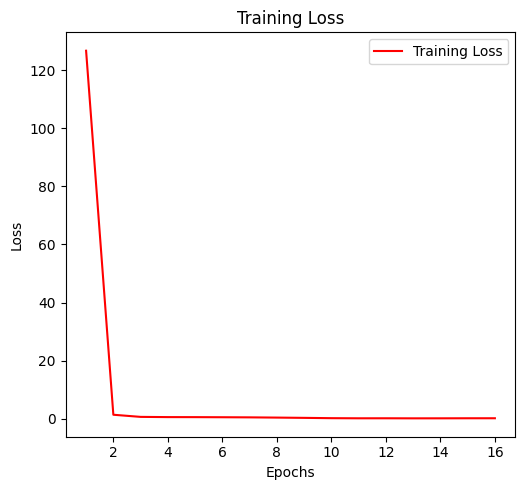

In [98]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_cnn, loss_cv, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
# Getting accuracy from the history
accuracy_cnn = history_cnn.history['accuracy']

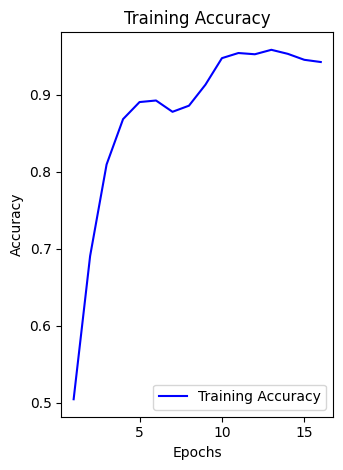

In [100]:
# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_cnn, accuracy_cnn, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Leaky ReLU

In [101]:
# Creating the model with Leaky ReLU
model_relu = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=LeakyReLU(alpha=0.1), input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=LeakyReLU(alpha=0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')])

In [103]:
#Compilation
model_relu.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [104]:
# Model2 Training with Cross Validation
history_relu = model_relu.fit(dataset_cv, epochs=20, callbacks=[early_stopping])

Epoch 1/20
816/816 [==============================] - 101s 121ms/step - loss: 296.1085 - accuracy: 0.5032
Epoch 2/20
816/816 [==============================] - 101s 122ms/step - loss: 29.7869 - accuracy: 0.5774
Epoch 3/20
816/816 [==============================] - 96s 116ms/step - loss: 60.2868 - accuracy: 0.6087
Epoch 4/20
816/816 [==============================] - 97s 118ms/step - loss: 13.6684 - accuracy: 0.6806
Epoch 5/20
816/816 [==============================] - 94s 114ms/step - loss: 7.2838 - accuracy: 0.7469
Epoch 6/20
816/816 [==============================] - 99s 120ms/step - loss: 189.4754 - accuracy: 0.5832
Epoch 7/20
816/816 [==============================] - 97s 117ms/step - loss: 20.4068 - accuracy: 0.6174
Epoch 8/20
816/816 [==============================] - 98s 119ms/step - loss: 9.5509 - accuracy: 0.6885


In [146]:
model_path = 'fashion_products/fashion-dataset/model.h7'
model_relu.save('/content/drive/MyDrive/my_model.h3')

## Swish activation

In [107]:
# Creating the model with Swish activation
model_swish = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation=swish, input_shape=(img_height, img_width, img_channels)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=swish),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [108]:
# Model Compilation
model_swish.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [109]:
# Model Training with Cross Validation
history_swish = model_swish.fit(dataset_cv, epochs=40, callbacks=[early_stopping])

Epoch 1/40
816/816 [==============================] - 102s 122ms/step - loss: 190.9435 - accuracy: 0.5028
Epoch 2/40
816/816 [==============================] - 101s 123ms/step - loss: 1.2129 - accuracy: 0.6727
Epoch 3/40
816/816 [==============================] - 99s 120ms/step - loss: 0.6525 - accuracy: 0.8037
Epoch 4/40
816/816 [==============================] - 99s 120ms/step - loss: 0.5658 - accuracy: 0.8691
Epoch 5/40
816/816 [==============================] - 99s 120ms/step - loss: 0.5644 - accuracy: 0.8805
Epoch 6/40
816/816 [==============================] - 96s 116ms/step - loss: 0.5855 - accuracy: 0.8783
Epoch 7/40
816/816 [==============================] - 95s 115ms/step - loss: 0.5510 - accuracy: 0.8763
Epoch 8/40
816/816 [==============================] - 97s 117ms/step - loss: 0.4347 - accuracy: 0.8904
Epoch 9/40
816/816 [==============================] - 100s 121ms/step - loss: 0.3369 - accuracy: 0.9140
Epoch 10/40
816/816 [==============================] - 103s 125ms/st

In [145]:
model_path = 'fashion_products/fashion-dataset/model.h8'
model_swish.save('/content/drive/MyDrive/my_model.h2')

In [113]:
# Get loss and accuracy from the history
loss_swish = history_swish.history['loss']

In [114]:
# Creating a list of epochs to use for the x-axis
epochs_swish = range(1, len(loss_swish) + 1)

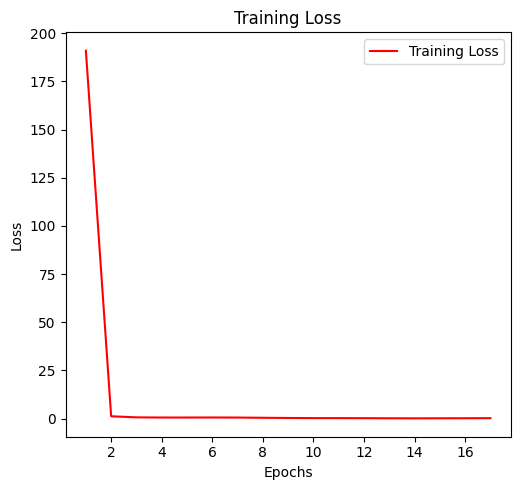

In [115]:
# Plotting the loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_swish, loss_swish, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [116]:
# Getting accuracy from the history
accuracy_swish = history_swish.history['accuracy']

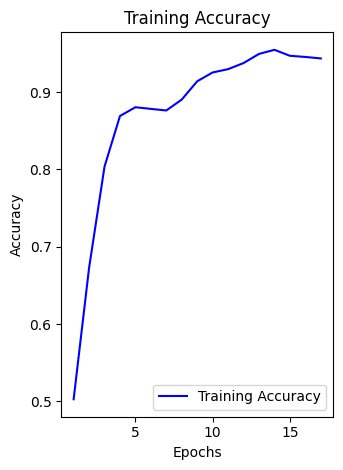

In [117]:
# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_swish, accuracy_swish, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
# Loading Pre-trained Model
base_model = tf.keras.applications.VGG16(input_shape=(img_height, img_width, img_channels),
                                        include_top=False,
                                        weights='imagenet')

58889256/58889256 [==============================] - 0s 0us/step


In [120]:
# Freezing Base Layers
base_model.trainable = False


In [131]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()


In [132]:
# Adding a dense layer with a ReLU activation
prediction_layer = tf.keras.layers.Dense(128, activation=swish)

In [133]:
# Building the model
model_tl = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer])

In [134]:
# Compiling the Model
model_tl.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [135]:
dataset_validation = tf.keras.utils.image_dataset_from_directory(
    data_directory_train,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=123)

Found 32620 files belonging to 2 classes.
Using 6524 files for validation.


In [136]:
model_tl.fit(dataset_cv, epochs=40, validation_data=dataset_validation, callbacks=[early_stopping])


Epoch 1/40
816/816 [==============================] - 133s 161ms/step - loss: 1.3136 - accuracy: 0.4985 - val_loss: 0.8738 - val_accuracy: 0.5132
Epoch 2/40
816/816 [==============================] - 131s 160ms/step - loss: 0.8114 - accuracy: 0.5131 - val_loss: 0.8740 - val_accuracy: 0.5362
Epoch 3/40
816/816 [==============================] - 131s 160ms/step - loss: 0.7879 - accuracy: 0.5180 - val_loss: 0.8128 - val_accuracy: 0.4842
Epoch 4/40
816/816 [==============================] - 131s 160ms/step - loss: 0.7746 - accuracy: 0.5154 - val_loss: 0.7743 - val_accuracy: 0.5235
Epoch 5/40
816/816 [==============================] - ETA: 0s - loss: 0.7761 - accuracy: 0.5135

KeyboardInterrupt: ignored

In [137]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    # Add more augmentations as needed
])

In [138]:
# Define the model
inputs = tf.keras.Input(shape=(img_height, img_width, img_channels))
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


In [139]:
model = tf.keras.Model(inputs, outputs)


In [141]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [143]:
model.fit(dataset_cv, epochs=200, validation_data=dataset_validation, callbacks=[early_stopping])

Epoch 1/10
816/816 [==============================] - 136s 164ms/step - loss: 1.0600 - accuracy: 0.5044 - val_loss: 0.9224 - val_accuracy: 0.5015
Epoch 2/10
816/816 [==============================] - 134s 163ms/step - loss: 0.8157 - accuracy: 0.5175 - val_loss: 0.8279 - val_accuracy: 0.5136
Epoch 3/10
816/816 [==============================] - 134s 163ms/step - loss: 0.7685 - accuracy: 0.5217 - val_loss: 0.8078 - val_accuracy: 0.4952
Epoch 4/10
816/816 [==============================] - 134s 163ms/step - loss: 0.7434 - accuracy: 0.5277 - val_loss: 0.8444 - val_accuracy: 0.4776
Epoch 5/10
816/816 [==============================] - 134s 163ms/step - loss: 0.7275 - accuracy: 0.5323 - val_loss: 0.7734 - val_accuracy: 0.4983
Epoch 6/10
816/816 [==============================] - 134s 163ms/step - loss: 0.7164 - accuracy: 0.5407 - val_loss: 0.7556 - val_accuracy: 0.5075
Epoch 7/10
816/816 [==============================] - 134s 163ms/step - loss: 0.7118 - accuracy: 0.5446 - val_loss: 0.7602 -

KeyboardInterrupt: ignored

In [144]:
model.save('/content/drive/MyDrive/my_model.h1')